In [44]:
import numpy as np
import matplotlib.pyplot as plt
import math

c = 3e8  # Speed of light in m/s

N_wavelength = 100  # Number of wavelengths to consider
N_tau = 100000 # Number of time delays to consider

displacement_step_m = 50e-9 # Displacement step of 100 nm
optical_path_length_diff = 2 * displacement_step_m

wavelengths = np.linspace(400e-9, 700e-9, N_wavelength)  # N_wavelength wavelengths from 400 nm to 700 nm
frequencies = c / wavelengths  # Frequencies corresponding to the wavelengths
angular_frequencies = 2 * math.pi * frequencies  # Angular frequencies

# Print the range of wavelengths and frequencies
print(f"Wavelength range (nm): {wavelengths[0]*1e9:.2f} nm to {wavelengths[-1]*1e9:.2f} nm")
print(f"Frequency range (THz): {frequencies[0]*1e-12:.2f} THz to {frequencies[-1]*1e-12:.2f} THz")

nyquist = 2 * max(frequencies)  # Nyquist rate based on highest frequency
step = 1 / nyquist  # Time step based on Nyquist criterion

# Print Nyquist frequency and time step
print(f"Nyquist frequency (Hz): {nyquist:.2e} Hz")
print(f"Time step (s): {step:.2e} s")

displacements_m = np.arange(N_tau) *  optical_path_length_diff # N_tau displacements of step size displacement_step_m
tau_values = displacements_m / c  # Corresponding time delays
tau_values_fs = tau_values * 1e15  # Convert tau_values to femtoseconds

average_intensity = np.zeros(len(tau_values)) # To store average intensities for each tau value

# Loop over different tau values to compute the average intensity
# for i, tau in enumerate(tau_values):
#     E_combined = np.zeros(num_points)  # Initialize combined electric field
#     E_combined_tau = np.zeros(num_points)  # For time delay

#     # Loop through each wavelength
#     for w in angular_frequencies:
#         E = np.cos(w * t)  # Electric field for this wavelength
#         E_tau = np.cos(w * (t + tau))  # Electric field with time delay

#         E_combined += E / np.sqrt(len(wavelengths))
#         E_combined_tau += E_tau / np.sqrt(len(wavelengths))

#     # Compute the intensity |E(t) + E(t + tau)|^2
#     intensity = np.abs(E_combined + E_combined_tau) ** 2
#     average_intensity[i] = np.mean(intensity)

#     # Print key time delays and average intensity
#     if i % 500 == 0:
#         print(f"At tau = {tau_values_fs[i]:.2f} fs, average intensity = {average_intensity[i]:.4f}")




Wavelength range (nm): 400.00 nm to 700.00 nm
Frequency range (THz): 750.00 THz to 428.57 THz
Nyquist frequency (Hz): 1.50e+15 Hz
Time step (s): 6.67e-16 s


In [45]:
#discrete spectrum
def I_tau(tau):
    I = 0 # Set intensity to zero
    for w in angular_frequencies:
        Es = 1 + np.exp(1j*(w * (tau))) # Electric field for given time delay and frequency
        #Es = Es+ np.cos(w * (tau))
        I = I + np.abs(1+Es)**2 # Total intensity for given time delay across all frequencies
    return I

average_intensity = tau_values_fs*0
for i_tau in range(len(tau_values)):
    average_intensity[i_tau] = I_tau(tau_values[i_tau]) # Store each total intensity for a corresponding tau in an array

In [42]:
#continuous spectrum (defined in the temporal domain)

def I_tau(tau):
    I = 0
    for w in angular_frequencies:
        Es = 1 + np.exp(1j*(w * (tau)))*np.exp(-(tau/5e-15)**2) # Multiply by a Gaussian envelope to produce a continuous spectrum
        I = I + np.abs(1+Es)**2 # Calcuate total intensity for given time delay across all frequencies
    return I

average_intensity = tau_values_fs*0
for i_tau in range(len(tau_values)):
    average_intensity[i_tau] = I_tau(tau_values[i_tau]) # Store each total intensity for a corresponding tau in an array

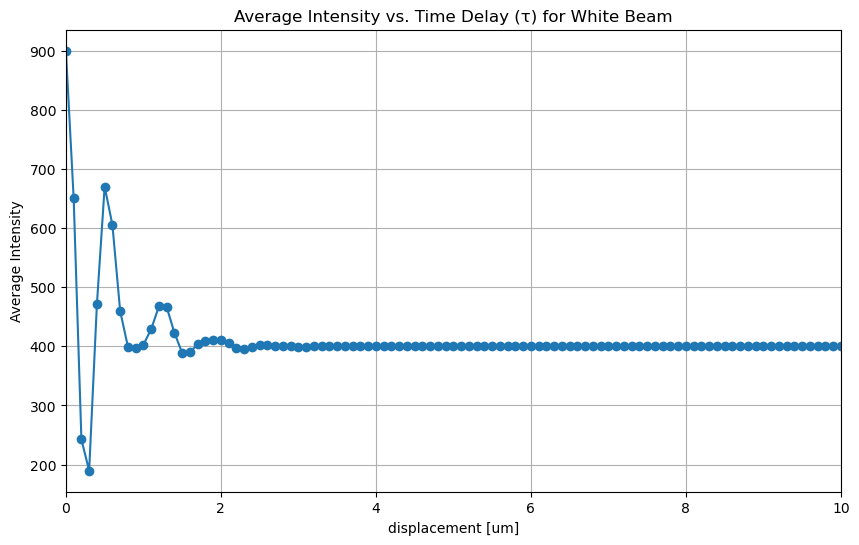

In [43]:
# Plotting the average intensity vs tau
plt.figure(figsize=(10, 6))
#plt.plot(tau_values_fs, average_intensity, '-o')  # Tau in femtoseconds
plt.xlabel('Time Delay τ (fs)')
plt.plot(displacements_m*1e6, average_intensity, '-o')  # Tau in femtoseconds
plt.title('Average Intensity vs. Time Delay (τ) for White Beam')
plt.xlabel('displacement [um]')
plt.xlim(0, 10)
plt.ylabel('Average Intensity')

plt.grid()
plt.savefig('average_intensity_vs_time_delay.png', dpi=300)  # Save the figure
plt.show()

Sample FFT frequencies (THz): [0.03 0.06 0.09 0.12 0.15]
Sample FFT intensities: [178.36545416 178.36545794 178.36546422 178.36547301 178.36548435]


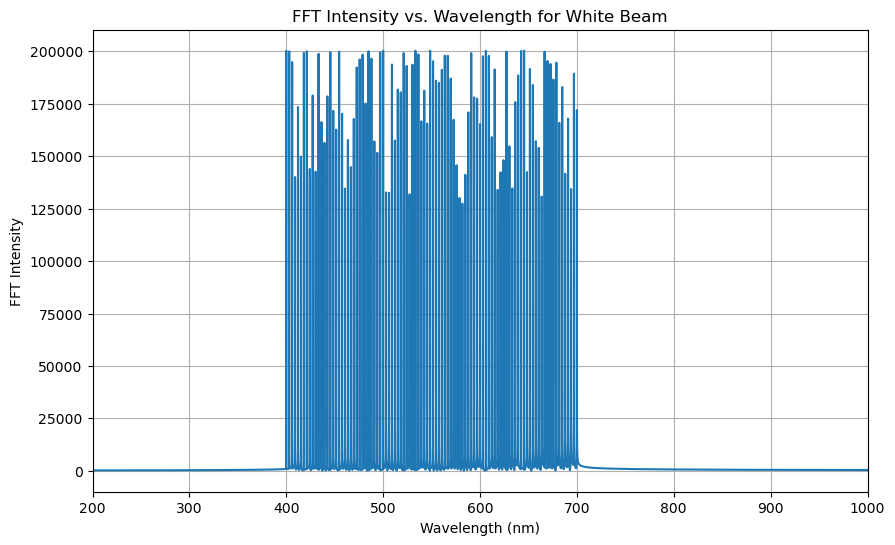

Sample FFT wavelengths (nm): [10000000.          5000000.          3333333.33333333  2500000.
  2000000.        ]
Sample FFT intensities: [178.36545416 178.36545794 178.36546422 178.36547301 178.36548435]


In [46]:
# FFT of average intensity
fft_intensity = np.fft.fft(average_intensity)
fft_freqs = np.fft.fftfreq(len(average_intensity), tau_values[1] - tau_values[0])
positive_freqs = fft_freqs[fft_freqs > 0]
positive_fft_intensity = np.abs(fft_intensity[fft_freqs > 0])

# Print sample FFT frequencies and intensities
print("Sample FFT frequencies (THz):", positive_freqs[:5] * 1e-12)
print("Sample FFT intensities:", positive_fft_intensity[:5])

# Convert frequencies to wavelengths and plot
fft_wavelengths = c / positive_freqs
plt.figure(figsize=(10, 6))
plt.plot(fft_wavelengths * 1e9, positive_fft_intensity)  # Convert wavelengths to nm
plt.title('FFT Intensity vs. Wavelength for White Beam')
plt.xlabel('Wavelength (nm)')
plt.ylabel('FFT Intensity')
#plt.xlim([300, 900])
plt.xlim([200, 1000])
plt.grid()
plt.savefig('fft_intensity_vs_wavelength.png', dpi=300)  # Save the figure
plt.show()

# Print sample FFT wavelengths and corresponding intensities
print("Sample FFT wavelengths (nm):", fft_wavelengths[:5] * 1e9)
print("Sample FFT intensities:", positive_fft_intensity[:5])